In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import collections
import numpy as np

In [12]:
import glob
file_paths = glob.glob('./data/*')
tweet_type_per_file={}
frames = []
for i, p in enumerate(file_paths):
    if i > 5:
        break
    tweets = pd.read_csv(p)
    frames.append(tweets)
big_frame = pd.concat(frames)

In [58]:
tweets = big_frame

In [59]:
english_tweets = tweets[(tweets['language']=='English') & (tweets['region']=="United States")]

In [41]:
"""
def parse_tweet_type(tweets):
    tweets['tweet_type_response'] = [0] * len(tweets)
    tweets['tweet_type_new_content'] =[0] * len(tweets)
    
    tweets['tweet_type_response'] = tweets.apply(lambda x: 1 if x['content'].find("@") == 0 else 0, axis=1)
    tweets['tweet_type_new_content'] = tweets.apply(lambda x: 0 if x['content'].find("@") == 0  else 1, axis=1)
"""



In [42]:
parse_tweet_type(english_tweets)

/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [70]:
def clean_data(tweets):
    tweets['content'] = tweets.applymap(lambda x:x['content'].lower() if type(x['content']) == str else x['content'])
    return tweets

In [73]:
english_tweets['content'] = english_tweets['content'].str.lower()

#c=tweets[['tweet_type_response','tweet_type_new_content', 'retweet','publish_date']]

/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
english_tweets_retweet = english_tweets[english_tweets['post_type']=='RETWEET']
english_tweets_quote = english_tweets[english_tweets['post_type']=='QUOTE_TWEET']
english_tweets_new_content = english_tweets[english_tweets['retweet']==0]

# New content

In [76]:

english_tweets_new_content.index = pd.to_datetime(english_tweets_new_content["publish_date"])

In [83]:
english_tweets_new_content[['count']]

,count
publish_date,
2015-05-25 12:38:00,1
2015-05-25 12:38:00,1
2015-05-25 12:39:00,1
2015-05-25 12:39:00,1
2015-05-25 12:39:00,1
...,...
2016-05-08 18:42:00,1
2016-05-08 18:43:00,1
2016-05-08 18:45:00,1


In [77]:
english_tweets_new_content = english_tweets_new_content.drop(columns=["publish_date"])

In [80]:
english_tweets_new_content['count'] = [1] * len(english_tweets_new_content)

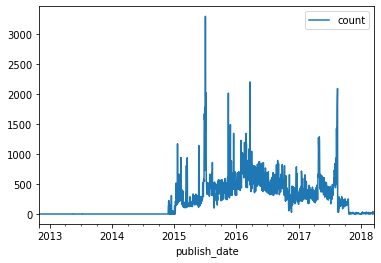

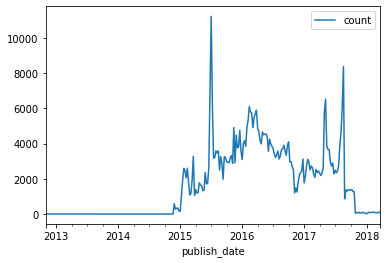

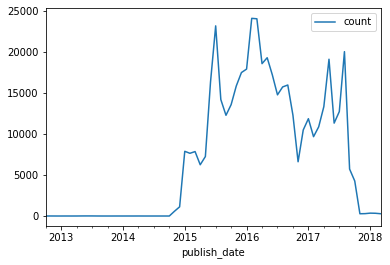

In [81]:
english_tweets_new_content[['count']].resample('D').sum().plot()
english_tweets_new_content[['count']].resample('W').sum().plot()
english_tweets_new_content[['count']].resample('M').sum().plot()

In [71]:
def word_freq(tweets):
    content_loc= tweets.columns.get_loc("content")
    words = []
    for i in range(len(tweets)):
        c = tweets.iloc[i, content_loc]
        if isinstance(c, str):
            words.append(c.lower().split(" "))
    words = list(itertools.chain(*words))
    counts= collections.Counter(words)
    return counts

In [72]:
counter = word_freq(tweets[(tweets['retweet']==0)&(tweets['language']=='English')])

In [74]:
counter.most_common(300)

[('in', 23085),
 ('to', 21608),
 ('', 21558),
 ('the', 15447),
 ('of', 13573),
 ('for', 12491),
 ('a', 9562),
 ('on', 8014),
 ('and', 6890),
 ('is', 6347),
 ('at', 5893),
 ('police', 5735),
 ('#news', 5614),
 ('#sports', 5387),
 ('with', 5138),
 ('man', 5079),
 ('#politics', 3965),
 ('after', 3958),
 ('trump', 3648),
 ('from', 3438),
 ('you', 3130),
 ('#cleveland', 2878),
 ('are', 2773),
 ('cleveland', 2731),
 ('by', 2715),
 ('new', 2631),
 ('be', 2623),
 ('that', 2491),
 ('phoenix', 2460),
 ('not', 2370),
 ('this', 2228),
 ('as', 2196),
 ('i', 2176),
 ('#business', 2166),
 ('who', 2106),
 ('ohio', 2076),
 ('will', 2021),
 ('it', 1979),
 ('about', 1962),
 ('woman', 1913),
 ('shooting', 1889),
 ('#local', 1881),
 ('#crime', 1831),
 ('\\|', 1826),
 ('was', 1765),
 ('we', 1690),
 ('have', 1685),
 ('what', 1669),
 ('arizona', 1540),
 ('his', 1529),
 ('over', 1498),
 ('more', 1480),
 ('our', 1466),
 ('killed', 1464),
 ('he', 1458),
 ('fire', 1451),
 ('they', 1440),
 ('state', 1426),
 ('has'

In [90]:
tweets['datetime'] = pd.to_datetime(tweets["publish_date"])

In [102]:
tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,datetime
0,3771665775,NOVOSTIKRSNDR,Рейтинговое агентство Moody's улучшило прогноз...,Unknown,Ukrainian,2/26/2017 15:12,2/26/2017 15:12,284,3861,5586,...,0,NonEnglish,1,3771665775,835870062510645248,http://twitter.com/3771665775/statuses/8358700...,https://twitter.com/NovostiKrsndr/status/83587...,http://dlvr.it/NThR1P,NaN,2017-02-26 15:12:00
1,3771665775,NOVOSTIKRSNDR,В Сочи водитель автомобиль сбил велосипедиста ...,Unknown,Russian,2/26/2017 16:50,3/4/2017 2:29,284,3865,6058,...,0,NonEnglish,1,3771665775,835894718659690500,http://twitter.com/3771665775/statuses/8358947...,https://twitter.com/NovostiKrsndr/status/83589...,http://dlvr.it/NTk4wc,NaN,2017-02-26 16:50:00
2,3771665775,NOVOSTIKRSNDR,Nokia представила новую версию 3310 https://t....,Unknown,Serbian,2/26/2017 18:30,2/26/2017 18:30,284,3861,5589,...,0,NonEnglish,1,3771665775,835919873238675457,http://twitter.com/3771665775/statuses/8359198...,https://twitter.com/NovostiKrsndr/status/83591...,http://dlvr.it/NTllJB,NaN,2017-02-26 18:30:00
3,3771665775,NOVOSTIKRSNDR,WADA объяснило заявление о недостатке доказате...,Unknown,Russian,2/26/2017 5:45,2/26/2017 5:45,284,3861,5566,...,0,NonEnglish,1,3771665775,835727364600410113,http://twitter.com/3771665775/statuses/8357273...,https://twitter.com/NovostiKrsndr/status/83572...,http://dlvr.it/NTX3Pr,NaN,2017-02-26 05:45:00
4,3771665775,NOVOSTIKRSNDR,Снова скандал: обманутые пайщики ЖСК «Есенина ...,Unknown,Uzbek,2/27/2017 10:06,2/27/2017 10:06,284,3862,5651,...,0,NonEnglish,1,3771665775,836155445249134592,http://twitter.com/3771665775/statuses/8361554...,https://twitter.com/NovostiKrsndr/status/83615...,http://dlvr.it/NV2GqY,NaN,2017-02-27 10:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233535,2260338140,POLITICS_T0DAY,Порошенко призвал к полной перезагрузке правит...,United States,Russian,2/16/2016 22:20,2/16/2016 22:20,92,887,12934,...,0,NonEnglish,0,2260338140,699720021396869121,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://www.interfax.ru/world/494930,NaN,2016-02-16 22:20:00
233536,2260338140,POLITICS_T0DAY,Турецкая атомная бомба появится в 2023 году. ...,United States,Russian,2/16/2016 22:25,2/16/2016 22:25,92,887,12935,...,0,NonEnglish,0,2260338140,699721241553432576,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://svpressa.ru/war21/article/142481/,NaN,2016-02-16 22:25:00
233537,2260338140,POLITICS_T0DAY,История одной татуировки. Тату на предплечье:...,United States,Russian,2/16/2016 22:31,2/16/2016 22:31,92,887,12936,...,0,NonEnglish,0,2260338140,699722743533674496,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://manzal.livejournal.com/359548.html,NaN,2016-02-16 22:31:00
233538,2260338140,POLITICS_T0DAY,"Индонезия, Китай, золото и isis #Эксклюзив@pol...",United States,Russian,2/16/2016 22:35,2/16/2016 22:35,92,887,12937,...,0,NonEnglish,0,2260338140,699723798849916928,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,NaN,NaN,2016-02-16 22:35:00


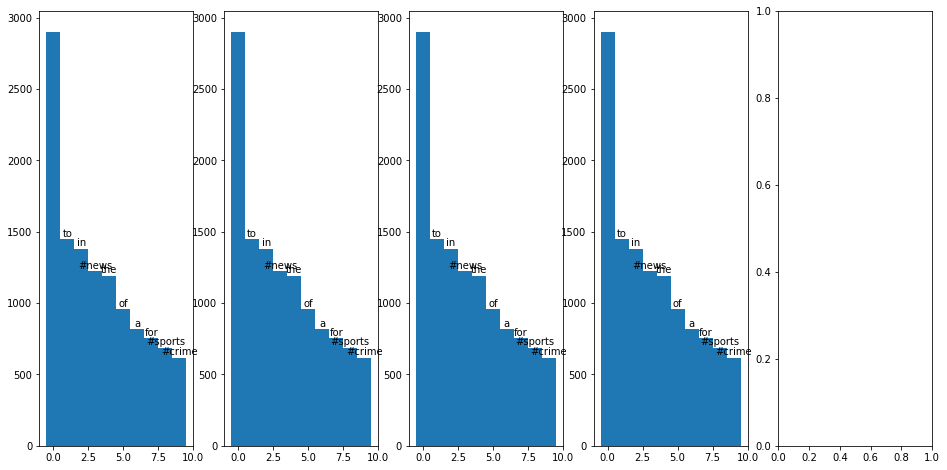

In [119]:
fig, ax = plt.subplots(1,5,figsize=(16, 8))
for year in range(2016,2017):
    for month in range(1,5):
        freqs = word_freq(
            tweets[
                (tweets['datetime']> pd.Timestamp(2016, 1,1)) & 
                (tweets['datetime']< pd.Timestamp(2016, 2,1)) &
                (tweets['language'] == 'English') & 
                (tweets['retweet']==0)
            ]
        ).most_common(10)
        
        labels, values = zip(*freqs)

        indexes = np.arange(len(labels))
        width = 1

        ax[month-1].bar(indexes, values, width)
        rects = ax[month-1].patches


        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax[month-1].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
        #ax[month-1].set_xt
        #ax[1].annotate("yimeng", xy=(0,300))